In [2]:
# Import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from arc import *
# https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/installation.html
import scipy.constants as cts
from numpy.linalg import eig
from sympy import S
from sympy.physics.quantum.cg import CG

In [3]:
# Some experimental parameters and constants
# Physical constants
a0 = cts.physical_constants['Bohr radius'][0]  # Bohr radius in meters
e = cts.e  # Electron charge in Coulombs  
hbar = cts.hbar  # Planck's constant divided by 2*pi in J*s 
h = cts.h  # Planck's constant in J*s
epsilon = cts.epsilon_0  # Vacuum permittivity in Farads/meter
c = cts.c  # Speed of light in meters/second

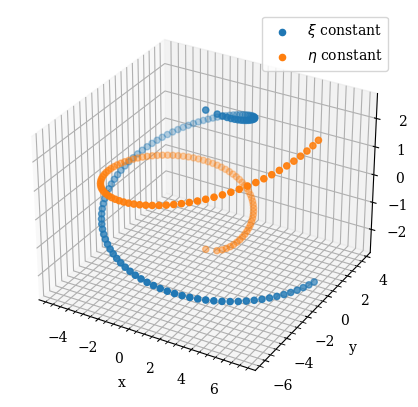

In [8]:
# Parabolic Coordinates, with xi constant

xi = np.full(100, 5)
ita = np.linspace(0, 10, 100)
phi = np.linspace(0, 2*np.pi, 100)
x = np.sqrt(xi*ita)*np.cos(phi)
y = np.sqrt(xi*ita)*np.sin(phi)
z = 1/2*(xi - ita)

# Parabolic Coordinates, with ita constant

xi = np.linspace(0, 10, 100)
ita = np.full(100, 5)
phi = np.linspace(0, 2*np.pi, 100)

x1 = np.sqrt(xi*ita)*np.cos(phi)
y1 = np.sqrt(xi*ita)*np.sin(phi)
z1 = 1/2*(xi - ita)

# Parabolic Coordinates, with phi constant

xi = np.linspace(0, 10, 100)
ita = np.linspace(0, 10, 100)
phi = np.full(100, np.pi/4)

x2 = np.sqrt(xi*ita)*np.cos(phi)
y2 = np.sqrt(xi*ita)*np.sin(phi)
z2 = 1/2*(xi - ita)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, label=r'$\xi$ constant')
ax.scatter(x1,y1,z1, label=r'$\eta$ constant')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()




# Conversion between the parabolic quantum number and the principal quantum number states
We should C-G coefficient to convert between parabolic quantum number and principal quantum numbers.

$$n=n_1+n_2+|m|+1$$
$$A_z = (n_1-n_2)/n$$
$$j_{1z}=\frac{1}{2}(m+n_1-n_2)= \mu_1$$
$$j_{2z}=\frac{1}{2}(m+n_1+n_2)= \mu_2$$
$$\frac{1}{2}(n-1)=\frac{1}{2}(n_1+n_2+|m|)=j_1=j_2$$

$$\psi_{nlm}=\sum_{\mu_1,\mu_2}|j_1,\mu_1,j_2,\mu_2;lm>\psi_{m\mu_1\mu_2}$$
$$\psi_{n\mu_1\mu_2}=\sum_{l=0}^{n-1}<l, \mu_1+\mu_2|\mu_1\mu_2>\psi_{nlm}$$


In [9]:
n = 30
m=3
n1 =0
n2 = n-n1-m-1
mu1 = 1/2*(m+n1-n2)
mu2 = 1/2*(m+n2+n1)
j = 1/2*(n-1)
l = n-1
cg = CG(j,mu1,j,mu2,l,m)
print(cg.doit())

sqrt(24247795564146)/12123897782073


# Construct the Starkmap using parabolic quantum number